In [32]:
import numpy as np
import pandas as pd

In [42]:
def moving_average(series, n):
    """
        Calculate average of last n observations
    """
    train, test = series[0:-6], series[-6:]
    
    # Forecast the last 6 observations
    preds = [*train]
    for i in range(len(test)):
        preds.append(np.average(preds[-n:]))
    
    print(test, preds[-6:])
    
    # Calculate error (MAE  - Mean Absolute Error)
    error = np.average(np.abs(test - preds[-6:]))

    # prediction
    return preds[-6:], error, np.average(preds[-n:])

In [34]:
def exponential_smoothing(series, alpha):
    """
        Calculate exponential smoothing
    """
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [35]:
def double_exponential_smoothing(series, alpha, beta):
    """
        Calculate double exponential smoothing
    """
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

In [36]:
data = pd.read_excel('data.xlsx', "Sheet1", index_col=[0])
data.columns = ["340290", "441820", "730830", "871200", "72", "61", "62", "94", "08", "63"]
all_data = {}
for col in data.columns:
    all_data[col] = data[col].tolist()
all_data

{'340290': [11597,
  26638,
  23774,
  28260,
  26694,
  23763,
  28300,
  30376,
  42768,
  46284,
  58112,
  67816,
  53533,
  49231,
  48807,
  45675,
  49285,
  79336,
  56649,
  77581],
 '441820': [8562,
  10121,
  16767,
  23771,
  25438,
  32634,
  49700,
  47913,
  53412,
  56499,
  88439,
  136486,
  86857,
  68018,
  65455,
  68208,
  71524,
  84037,
  103137,
  124334],
 '730830': [10915,
  15696,
  17041,
  23663,
  32074,
  43692,
  44257,
  49487,
  69102,
  89556,
  118852,
  129463,
  125089,
  109699,
  108322,
  108768,
  128277,
  139782,
  209249,
  224035],
 '871200': [14449,
  21785,
  24813,
  24302,
  26154,
  25783,
  26812,
  28834,
  28404,
  31852,
  48929,
  58633,
  60678,
  49747,
  30223,
  37879,
  49051,
  53261,
  80253,
  88417],
 '72': [2969012,
  5359512,
  4973475,
  6273353,
  8372266,
  14946358,
  7641010,
  8740067,
  11225329,
  11332482,
  9785707,
  9118083,
  6556742,
  6187046,
  8230403,
  11546435,
  10020302,
  8803211,
  17075722,
  1

In [44]:
moving_average(all_data['340290'], 3)

[48807, 45675, 49285, 79336, 56649, 77581] [56860.0, 53208.0, 53099.666666666664, 54389.22222222222, 53565.62962962963, 53684.83950617284]


TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [51]:
for i, j in all_data.items():
    print(j)

[11597, 26638, 23774, 28260, 26694, 23763, 28300, 30376, 42768, 46284, 58112, 67816, 53533, 49231, 48807, 45675, 49285, 79336, 56649, 77581]
[8562, 10121, 16767, 23771, 25438, 32634, 49700, 47913, 53412, 56499, 88439, 136486, 86857, 68018, 65455, 68208, 71524, 84037, 103137, 124334]
[10915, 15696, 17041, 23663, 32074, 43692, 44257, 49487, 69102, 89556, 118852, 129463, 125089, 109699, 108322, 108768, 128277, 139782, 209249, 224035]
[14449, 21785, 24813, 24302, 26154, 25783, 26812, 28834, 28404, 31852, 48929, 58633, 60678, 49747, 30223, 37879, 49051, 53261, 80253, 88417]
[2969012, 5359512, 4973475, 6273353, 8372266, 14946358, 7641010, 8740067, 11225329, 11332482, 9785707, 9118083, 6556742, 6187046, 8230403, 11546435, 10020302, 8803211, 17075722, 14628379]
[5732569, 6259222, 6590352, 6938275, 8022460, 7826732, 6925548, 7731212, 8385636, 8418618, 9362240, 10127967, 8927259, 8855609, 8840031, 9043113, 9206940, 8387723, 10784069, 11011472]
[3813876, 4536829, 4862376, 4710984, 5445286, 532672

In [79]:
time

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

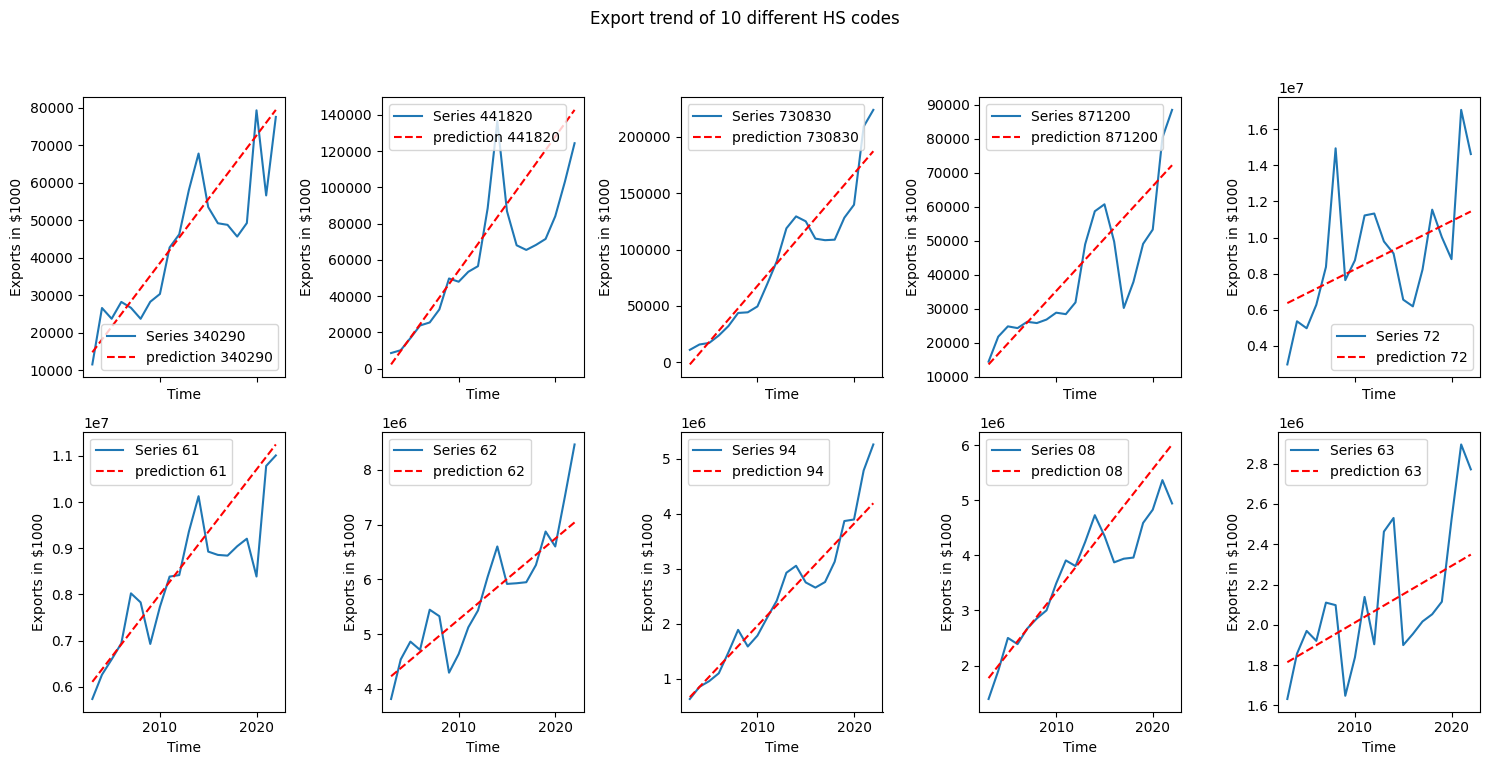

In [104]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some example time series data
num_series = len(all_data)
num_points = len(all_data['340290'])
time = np.arange(2003, 2023)


# Plotting the time series
fig, axs = plt.subplots(2, 5, figsize=(15, 8), sharex=True, sharey=None)
fig.suptitle('Export trend of 10 different HS codes')

# Flatten the axs array for easier iteration
axs = axs.flatten()

idx = 0
for hs, i in all_data.items():
    axs[idx].plot(time, i, label=f'Series {hs}')
    axs[idx].legend()
    axs[idx].set_xlabel('Time')
    axs[idx].set_ylabel('Exports in $1000')

    preds, _, _ = linear_regression(i)

    axs[idx].plot(time, preds, label=f'prediction {hs}', color='red', linestyle='dashed')
    axs[idx].legend()
    axs[idx].set_xlabel('Time')
    axs[idx].set_ylabel('Exports in $1000')

    idx += 1

# Adjust layout to prevent clipping of labels
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

In [82]:
X_train, X_test = time[:-6].reshape(-1, 1), time[-6:].reshape(-1, 1)
y_train, y_test = all_data['340290'][:-6], all_data['340290'][-6:]

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)
mse = round(mean_squared_error(y_test, preds), 1)
mae = round(mean_absolute_error(y_test, preds), 1)
print(f'MSE: {mse}, MAE: {mae}')

MSE: 236029247.1, MAE: 13622.5


(-6797436.747252747, array([3401.03296703]))

In [100]:
def linear_regression(series):
    """
        Calculate linear regression
    """
    X_train, X_test = time[:-6].reshape(-1, 1), time[-6:].reshape(-1, 1)
    y_train, y_test = series[:-6], series[-6:]
    model = LinearRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = round(mean_squared_error(y_test, preds), 1)
    mae = round(mean_absolute_error(y_test, preds), 1)
    preds_plot = model.predict(time.reshape(-1, 1))
    return preds_plot, mse, mae

linear_regression(all_data['340290'])

(array([14832.28571429, 18233.31868132, 21634.35164835, 25035.38461538,
        28436.41758242, 31837.45054945, 35238.48351648, 38639.51648352,
        42040.54945055, 45441.58241758, 48842.61538462, 52243.64835165,
        55644.68131868, 59045.71428571, 62446.74725275, 65847.78021978,
        69248.81318681, 72649.84615385, 76050.87912088, 79451.91208791]),
 236029247.1,
 13622.5)

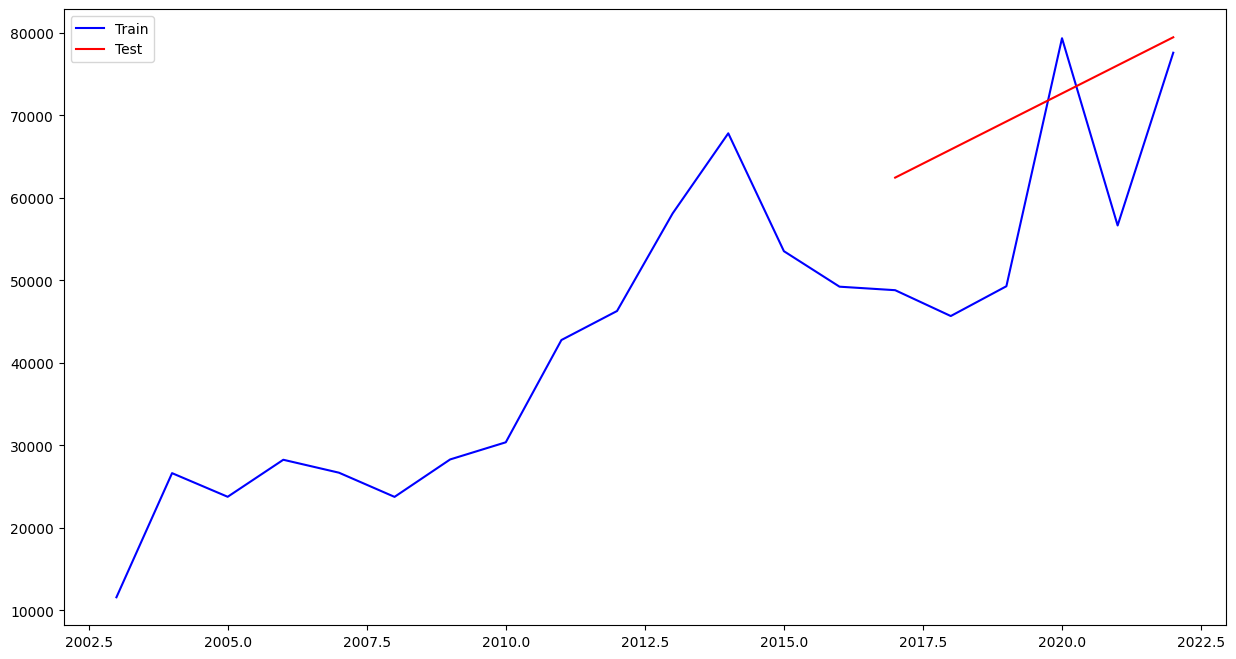

In [93]:
def plot_results(X_train, y_train, X_test, preds):
    plt.figure(figsize=(15, 8))
    plt.plot(X_train, y_train, color='blue', label='Train')
    plt.plot(X_test, preds, color='red', label='Test')
    plt.legend()
    plt.show()

plot_results(time, all_data["340290"], X_test, preds)

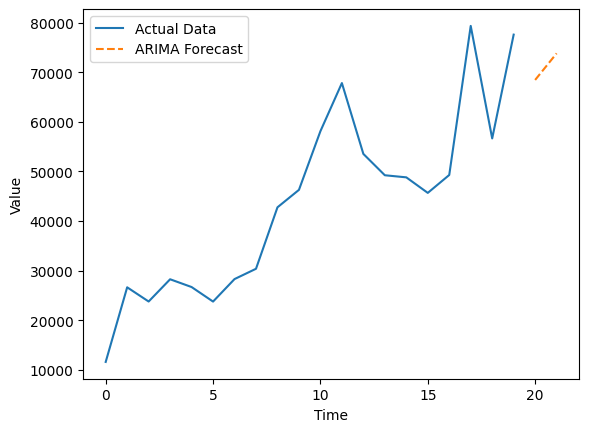

In [106]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Your time series data
data = [11597, 26638, 23774, 28260, 26694, 23763, 28300, 30376, 42768, 46284, 58112, 67816, 53533, 49231, 48807, 45675, 49285, 79336, 56649, 77581]

# Fit ARIMA model
model = ARIMA(data, order=(1, 1, 1))  # Adjust order as needed
fit_model = model.fit()



# Forecast the next values
forecast_steps = 2  # Adjust as needed
forecast = fit_model.get_forecast(steps=forecast_steps).predicted_mean

# Plotting the results
plt.plot(data, label='Actual Data')
plt.plot(range(len(data), len(data) + forecast_steps), forecast, label='ARIMA Forecast', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [107]:
from fbprophet import Prophet

# Prepare data for Prophet
df = pd.DataFrame({'ds': pd.date_range(start='2023-01-01', periods=len(data)), 'y': data})

# Fit Prophet model
model_prophet = Prophet()
model_prophet.fit(df)

# Create a dataframe with future dates for prediction
future = model_prophet.make_future_dataframe(periods=5, freq='D')  # Adjust periods as needed

# Make predictions
forecast_prophet = model_prophet.predict(future)

# Plotting the results
fig = model_prophet.plot(forecast_prophet)
plt.show()


ModuleNotFoundError: No module named 'fbprophet'